In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
file_cc = "df_europe.csv"
df_cc = pd.read_csv(file_cc)

In [4]:
file_price = "df_meat_price.csv"
df_p = pd.read_csv(file_price)

- First, we have to filter the df about climate change (temperature change) to analyze the change in temperature in Europe and European subregion.

- Then, we melt the dataframe in order to have the years as values and not as individual columns.
- Since the years are too many to be visualized, we finally categorize them in groups of 4-5 years

In [5]:
df_cc_filter = df_cc.drop(['Income Group', 'Area (KM²)', 'Density (KM²)','Europe'], axis=1)

In [6]:
melted_df = df_cc_filter.melt(id_vars='Country', var_name='years', value_name='Temperature')

In [7]:
melted_df['years'].unique()

array(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'], dtype=object)

In [8]:
melted_df['years'] = melted_df['years'].apply(lambda x: int(x))

In [9]:
def year_categ(year):
    
    if 1969 <= year <= 1975:
        return "1969-1975"
    elif 1976 <= year <= 1980:
        return "1976-1980"
    elif 1981 <= year <= 1986:
        return "1981-1986"
    elif 1986 <= year <= 1991:
        return "1986-1991"
    elif 1992 <= year <= 1997:
        return "1992-1997"
    elif 1998 <= year <= 2003:
        return "1998-2003"
    elif 2004 <= year <= 2009:
        return "2004-2009"
    elif 2010 <= year <= 2015:
        return "2010-2015"
    elif 2016 <= year <= 2020:
        return "2016-2020"
    elif 2020 <= year <= 2022:
        return "2020-2022"
    else:
        return np.nan
        

In [10]:
melted_df["years"] = melted_df["years"].map(year_categ)

- Here, we have to format the countries names by grouping them in their correspondent european subregions

In [11]:
melted_df["Country"].unique()

array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Norway', 'Portugal',
       'Romania', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom'], dtype=object)

In [12]:
mapping = {'Albania':'Southern Europe', 
           'Austria':'Western Europe', 
           'Belgium':'Western Europe', 
           'Bosnia and Herzegovina':'Southern Europe',
           'Bulgaria':'Eastern Europe', 
           'Cyprus': 'Southern Europe', 
           'Denmark':'Northern Europe', 
           'Finland':'Northern Europe', 
           'France':'Western Europe', 
           'Germany':'Western Europe',
           'Greece':'Southern Europe', 
           'Iceland':'Northern Europe', 
           'Ireland':'Northern Europe', 
           'Italy':'Southern Europe', 
           'Latvia':'Northern Europe', 
           'Liechtenstein':'Western Europe',
           'Lithuania':'Northern Europe',
           'Luxembourg':'Western Europe', 
           'Malta':'Southern Europe', 
           'Monaco':'Western Europe', 
           'Norway': 'Northern Europe', 
           'Portugal':'Southern Europe',
           'Romania':'Eastern Europe',
           'Spain':'Southern Europe', 
           'Sweden':'Northern Europe', 
           'Switzerland':'Western Europe', 
           'Ukraine':'Eastern Europe',
           'United Kingdom':'Northern Europe'
          }

melted_df["Country"] = melted_df["Country"].map(mapping)

### Hypothesis 1: Global Temperature Trend

We hypothesize that the temperature of the global surface has changed over the years in Europe, becoming warmer and warmer.

In [13]:
mapping2 = {'Southern Europe':'Global', 
            'Western Europe':'Global',
            'Eastern Europe':'Global', 
            'Northern Europe':'Global', 
          }

melted_df["Global"] = melted_df["Country"].map(mapping2)

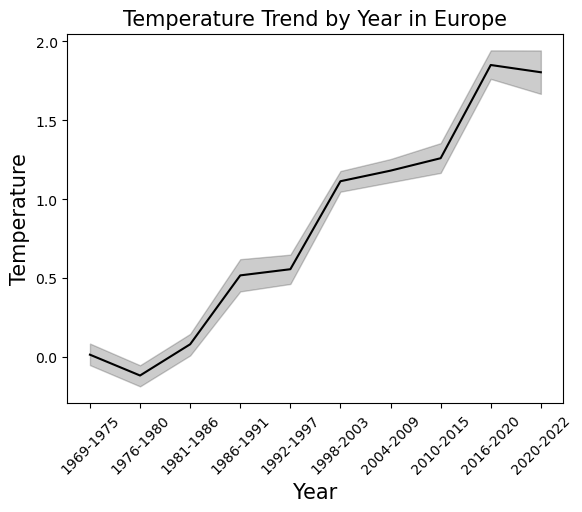

In [14]:
plot_h1 = sns.lineplot(melted_df, x = 'years', y= 'Temperature', legend=False, color = "black")
# Customize the plot 
plt.title('Temperature Trend by Year in Europe', fontsize=15) 
plt.xlabel('Year', fontsize=15) 
plt.ylabel('Temperature', fontsize=15) 
plt.xticks(rotation=45) # Rotate x-axis labels # Show plot plt.tight_layout() plt.show()

plt.savefig("./Figures/plot_h1.png", bbox_inches='tight')

### Hypothesis 2: European subregions Temperature Trend

We hypothesize that the temperature of the global surface has changed over the years in Europe, becoming warmer and warmer and that this change does not change between different European subregions.

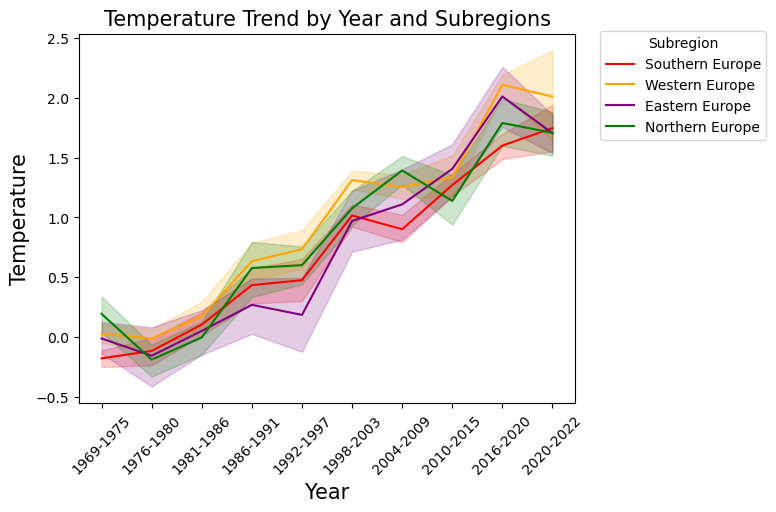

In [15]:
# Null Hypothesis (H0): There is no significant change in global surface temperatures over the years.
custom_palette = {'Southern Europe': 'red', 'Western Europe': 'orange', 'Eastern Europe': 'purple', 'Northern Europe': 'green'}

plot_h2 = sns.lineplot(melted_df, x = 'years', y= 'Temperature', hue = 'Country', palette = custom_palette)
# Customize the plot 
plt.title('Temperature Trend by Year and Subregions', fontsize=15) 
plt.xlabel('Year', fontsize=15) 
plt.ylabel('Temperature', fontsize=15) 
plt.xticks(rotation=45) # Rotate x-axis labels # Show plot plt.tight_layout() plt.show()

plt.legend(title = "Subregion", bbox_to_anchor=(1.4, 0.86), loc = "center right")

plt.savefig("./Figures/plot_h2.png", bbox_inches='tight')

### Hypothesis 3: The prices of animal products increase over the years and this increase may be correlated with increased temperatures

The price increase may be due to consequences of climate change, such as extreme weather events (droughts, floods, and heatwaves) that can disrupt agricultural production, leading to decreased supply of animal products and thus higher prices.

Water scarcity can also impact agriculture and animal - reduced water availability can increase the cost of production.

- In order to do so, we first have to render the two dataframes (temperature change and meat prices) consistent

In [16]:
# categorize the years as in the df for climate change

df_p["TIME_PERIOD"] = df_p["TIME_PERIOD"].map(year_categ)

In [17]:
# rename columns to be consistent with the df climate change

def rename_col(df):
    """ Function to rename columns 'TIME-PERIOD' and 'geo'"""
    
    df.columns = [x.replace ("TIME_PERIOD", "years") for x in df.columns]
    df.columns = [x.replace ("geo", "Country") for x in df.columns]
    
    return df

In [18]:
df_p = rename_col(df_p)

In [19]:
df_p = df_p.drop(["currency", "prod_ani", "prod_apr"], axis = 1)

In [20]:
# Categorizing the countries with the same mapping used for "melted_df" (climate change)
df_p["Country"] = df_p["Country"].map(mapping)

In [21]:
df_p["Global"] = df_p["Country"].map(mapping2)

In [22]:
melted_df.head()

,Country,years,Temperature,Global
0,Southern Europe,1969-1975,-0.013000,Global
1,Western Europe,1969-1975,-0.126000,Global
2,Western Europe,1969-1975,0.159265,Global
3,Southern Europe,1969-1975,0.159265,Global
4,Eastern Europe,1969-1975,-0.485000,Global


- **The two dataframes can now be merged**

In [23]:
# Create a new dataframe by concatenating/merging the df of climate change (melted) and the df of meat prices

df_conc = pd.merge(df_p, melted_df, on = ["Country", "years"])
df_conc.head()

,Country,years,OBS_VALUE,Global_x,Temperature,Global_y
0,Western Europe,1969-1975,43.95,Global,-0.126000,Global
1,Western Europe,1969-1975,43.95,Global,0.159265,Global
2,Western Europe,1969-1975,43.95,Global,0.024000,Global
3,Western Europe,1969-1975,43.95,Global,-0.111000,Global
4,Western Europe,1969-1975,43.95,Global,-0.015000,Global


In [24]:
# All NaN values converted to "Unknown" so we had to re-convert those in the column "OBS_VALUE" as NaN with "coerce"
df_conc["OBS_VALUE"] = pd.to_numeric(df_conc["OBS_VALUE"], errors="coerce")

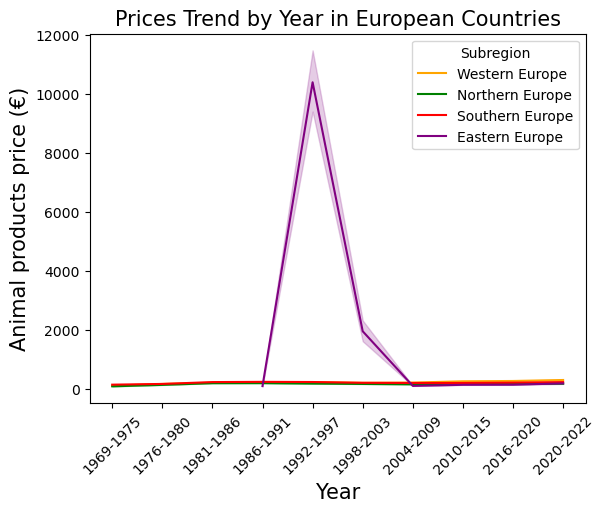

In [26]:
custom_palette = {'Southern Europe': 'red', 'Western Europe': 'orange', 'Eastern Europe': 'purple', 'Northern Europe': 'green'}
plot_h3 = sns.lineplot(df_conc, x = 'years', y= 'OBS_VALUE', hue = "Country", palette = custom_palette)
# Customize the plot 
plt.title('Prices Trend by Year in European Countries', fontsize=15) 
plt.xlabel('Year', fontsize=15) 
plt.ylabel('Animal products price (€)', fontsize=15) 
plt.xticks(rotation=45)
plt.legend(title = "Subregion")

plt.savefig("./Figures/plot_h3_1.png", bbox_inches='tight')

### We exclude the Eastern Europe since the peak in 1992-1997 hides the other data

In [27]:
df_conc_filter = df_conc[ df_conc["Country"] != "Eastern Europe"]

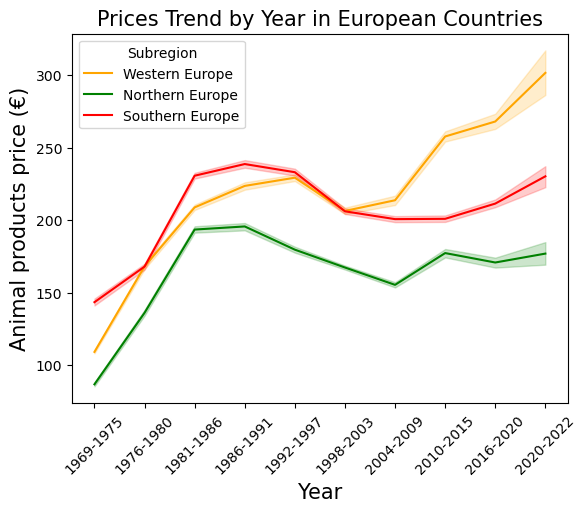

In [29]:
custom_palette = {'Southern Europe': 'red', 'Western Europe': 'orange', 'Northern Europe': 'green'}
plot_h3 = sns.lineplot(df_conc_filter, x = 'years', y= 'OBS_VALUE', hue = "Country", palette=custom_palette)
# Customize the plot 
plt.title('Prices Trend by Year in European Countries', fontsize=15) 
plt.xlabel('Year', fontsize=15) 
plt.ylabel('Animal products price (€)', fontsize=15) 
plt.xticks(rotation=45)
plt.legend(title = "Subregion")

plt.savefig("./Figures/plot_h3_2.png", bbox_inches='tight')

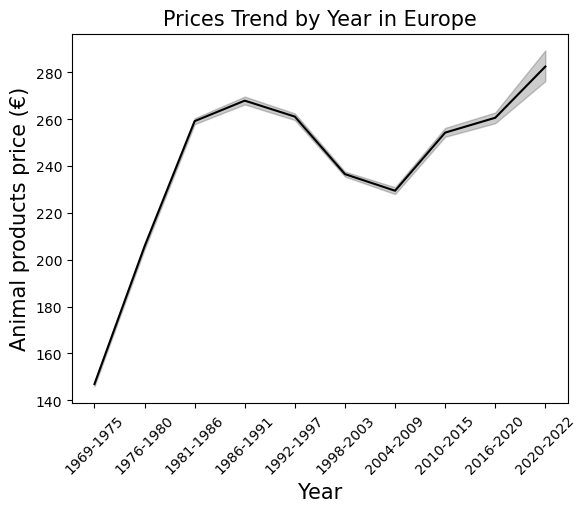

In [64]:
plot_h3 = sns.lineplot(df_conc_filter, x = 'years', y= 'OBS_VALUE', color = "black")
# Customize the plot 
plt.title('Prices Trend by Year in Europe', fontsize=15) 
plt.xlabel('Year', fontsize=15) 
plt.ylabel('Animal products price (€)', fontsize=15) 
plt.xticks(rotation=45)

plt.savefig("./Figures/plot_h3_3.png", bbox_inches='tight')

- **Now, we try to correlate the prices with the temperature increase over the years**
- To do so, since there are more than 10.000 unique values in the column prices ("OBS_VALUE"), we have to round all numbers to the nearest by categorizing them

In [29]:
max(df_conc_filter["OBS_VALUE"])

2085.53

In [30]:
def categorize_prices2(price):
    if isinstance(price, float):
        
        if 1 <= price <= 15:
            return 10
        elif 16 <= price <= 50:
            return 50
        elif 51 <= price <= 100:
            return 100
        elif 101 <= price <= 200:
            return 200
        elif 201 <= price <= 300:
            return 300
        elif 301 <= price <= 400:
            return 400
        elif 401 <= price <= 500:
            return 500
        elif 501 <= price <= 600:
            return 600
        elif 601 <= price <= 700:
            return 700
        elif 701 <= price <= 800:
            return 800
        elif 801 <= price <= 1000:
            return 1000
        elif 1001 <= price <= 1200:
            return 1200
        elif 1201 <= price <= 1400:
            return 1400
        elif 1401 <= price <= 1600:
            return 1600
        elif 1601 <= price <= 1800:
            return 1800
        elif 1801 <= price <= 2086:
            return 2000 
        else:
            return np.nan
    else:
        return np.nan

In [31]:
df_conc_filter.loc[:, "OBS_VALUE"] = df_conc_filter["OBS_VALUE"].map(categorize_prices2)

- We also need to categorize temperature changes in order to use them as hue for our line graph

In [32]:
def categorize_temp(temp):
    if isinstance(temp, float):
        
        if -1 <= temp <= -0.5:
            return -1
        elif -0.49 <= temp <= 0:
            return 0
        elif 0.01 <= temp <= 0.5:
            return 0.5
        elif 0.51 <= temp <= 1:
            return 1
        elif 1.01 <= temp <= 1.5:
            return 1.5
        elif 1.501 <= temp <= 2:
            return 2
        elif 2.01 <= temp <= 2.5:
            return 2.5
        elif 2.51 <= temp <= 3:
            return 3
        else:
            return np.nan
    else:
        return np.nan

In [33]:
# Creation of a new column with the categorized temperature change values

df_conc_filter["Temperature_cat"] = df_conc_filter["Temperature"].map(categorize_temp)

C:\Users\laura\AppData\Local\Temp\ipykernel_19832\826522315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conc_filter["Temperature_cat"] = df_conc_filter["Temperature"].map(categorize_temp)


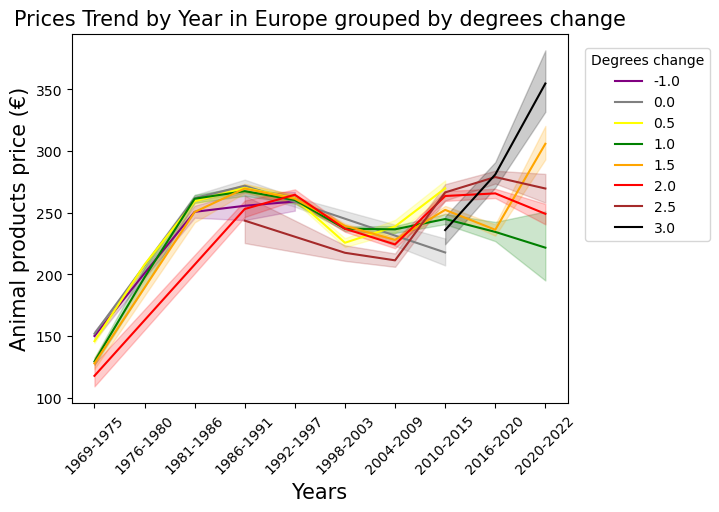

In [65]:
custom_palette = {-1: 'purple', -0.5: 'blue', 0: 'grey', 0.5: 'yellow', 1: 'green', 1.5 :'orange', 2:'red', 2.5:'brown', 3:'black'}

plot_h3 = sns.lineplot(df_conc_filter, x = 'years', y= 'OBS_VALUE', hue ="Temperature_cat", palette=custom_palette)
# Customize the plot 
plt.title('Prices Trend by Year in Europe grouped by degrees change', fontsize=15) 
plt.xlabel('Years', fontsize=15) 
plt.ylabel('Animal products price (€)', fontsize=15) 
plt.xticks(rotation=45)

plt.legend(title = "Degrees change", bbox_to_anchor=(1.3, 0.7), loc = "center right")

plt.savefig("./Figures/plot_h3_4.png", bbox_inches='tight')

- **We wanted to do a regression analysis of the correlation between animal products prices and temperature changes (but the plot is unclear)**

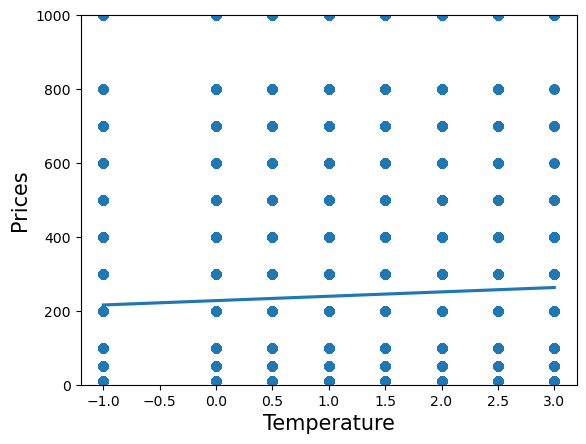

In [35]:
reg = sns.regplot(data= df_conc_filter, x="Temperature_cat", y = "OBS_VALUE")
reg.set_xlabel("Temperature", fontsize=15)
reg.set_ylabel("Prices", fontsize=15)
plt.ylim(0,1000)

x_data = reg.get_lines()[0].get_xdata()
y_data = reg.get_lines()[0].get_ydata()

In [36]:
# Linear regression parameters calculation
line_data = reg.get_lines()[0].get_data()

# regression coefficient
x_data = line_data[0]
y_data = line_data[1]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

r_squared = r_value ** 2
print(f"The Regression Coefficient is: {slope}")
print(f"The r squared value is: {r_squared}")

The Regression Coefficient is: 11.794302873292994
The r squared value is: 0.9999999999999996


- The regression coefficent and r2 may indicate an extremely high correlation, but these results are unclear since they could also represent the result of an overfitting

- **Finally, we wanted to check if the relationship between animal products prices and temperature change might be higher over the most recent years (from 2004 to 2022)**

In [37]:
df_recent = df_conc_filter[df_conc_filter["years"].isin(["2004-2009", "2010-2015", "2016-2020", "2020-2022"])]

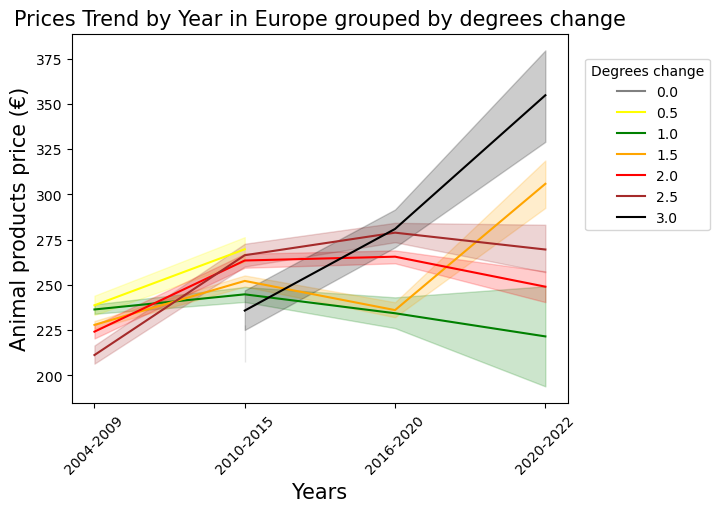

In [66]:
custom_palette = {-1: 'purple', -0.5: 'blue', 0: 'grey', 0.5: 'yellow', 1: 'green', 1.5 :'orange', 2:'red', 2.5:'brown', 3:'black'}

plot_h3 = sns.lineplot(df_recent, x = 'years', y= 'OBS_VALUE', hue ="Temperature_cat", palette=custom_palette)
# Customize the plot 
plt.title('Prices Trend by Year in Europe grouped by degrees change', fontsize=15) 
plt.xlabel('Years', fontsize=15) 
plt.ylabel('Animal products price (€)', fontsize=15) 
plt.xticks(rotation=45)

plt.legend(title = "Degrees change", bbox_to_anchor=(1.3, 0.7), loc = "center right")

plt.savefig("./Figures/plot_h3_4_RecentYears.png", bbox_inches='tight')

## Saving the dataframes to be uploaded to SQL script

In [32]:
sql_temp = melted_df.drop(["Global"], axis=1)

In [43]:
# mapping to create the years_id column (foreign key in SQL)

def years_id_col(year):
    
    if year == "1969-1975":
        return 1
    elif year == "1976-1980":
        return 2
    elif year == "1981-1986":
        return 3
    elif year == "1986-1991":
        return 4
    elif year == "1992-1997":
        return 5
    elif year == "1998-2003":
        return 6
    elif year == "2004-2009":
        return 7
    elif year == "2010-2015":
        return 8
    elif year == "2016-2020":
        return 9
    elif year == "2020-2022":
        return 10
    

In [44]:
# mapping to create the country_id column (foreign key in SQL)

def country_id_col(country):
    
    if country == "Southern Europe":
        return 1
    elif country == "Northern Europe":
        return 2
    elif country == "Eastern Europe":
        return 3
    elif country == "Western Europe":
        return 4

In [ ]:
sql_temp['year_id'] = sql_temp['years'].apply(years_id_col)

In [ ]:
sql_temp['subregion_id'] = sql_temp['Country'].apply(country_id_col)

In [ ]:
sql_temp.to_csv("sql_temperature.csv", index = False)

In [74]:
sql_prices = df_p.drop(["Global"], axis=1)

In [81]:
sql_prices.head()

,subregions,years,animal_price,year_id,subregion_id
0,Western Europe,1969-1975,43.95,1,4
1,Western Europe,1969-1975,2.07,1,4
2,Western Europe,1969-1975,34.52,1,4
3,Western Europe,1969-1975,86.23,1,4
4,Western Europe,1969-1975,54.99,1,4


In [76]:
sql_prices = sql_prices.rename(columns={"OBS_VALUE": "animal_price", "Country": "subregions"})

In [77]:
sql_prices['year_id'] = sql_prices['years'].apply(years_id_col)
sql_prices['subregion_id'] = sql_prices['subregions'].apply(country_id_col)

In [78]:
sql_prices['subregion_id'] = sql_prices['subregion_id'].apply(lambda x: int(x) if not pd.isna(x) else 5)

In [79]:
sql_prices['subregion_id'].unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [80]:
sql_prices.to_csv("sql_prices.csv", index = False)